## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [15]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [16]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [17]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [18]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [19]:
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

*We grouped by landing page and group to check how many times the treatment group viewed the old_page when they were supposed to view the new_page and how many times the control group viewed the new_page while they supposed to view the old_page* *adding 1928 + 1965 = 3893*.

In [20]:
df.groupby(['landing_page','group']).count()

user_id  timestamp  converted
landing_page group                                   
new_page     control       1928       1928       1928
             treatment   145311     145311     145311
old_page     control     145274     145274     145274
             treatment     1965       1965       1965

f. Do any of the rows have missing values?

In [21]:
df.info() #no missing values in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [22]:
df2 = df.drop(df.query('(group == "treatment" & landing_page == "old_page") | group == "control" & landing_page == "new_page"').index)

In [23]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [24]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [25]:
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

*As shown above, the user_id is 773192, this user is in the treatment group and they did not convert after viewing the new page.*

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [26]:
#deleting the row using its index
df2 = df2.drop([2893])

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [27]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [28]:
df2[df2['group'] == 'control'].converted.mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [29]:
df2[df2['group'] == 'treatment'].converted.mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [30]:
df2[df2.landing_page == 'new_page'].user_id.count()/df2.shape[0]

0.50006194422266881

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Answer:**  
*There is no sufficient evidence to decide which page leads to more conversions. From the calculations above we can see that the probability an individual converts given they're in the control group (viewing the old page) is almost equal to an individual converting if they're in the treatment group (viewing the new page). Also, it's equaly likely that an individual receives the old or the new page (probability = 0.5).*

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$H_0: p_{new} - p_{old} \leq 0$$
$$H_1: p_{new} - p_{old} > 0$$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [31]:
p_new = df2.converted.mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [32]:
p_old = df2.converted.mean()
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [33]:
n_new = df2[df2['group'] == 'treatment'].user_id.nunique()
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [34]:
n_old = df2[df2['group'] == 'control'].user_id.nunique()
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [38]:
#generate a sample of 1s and 0s of size n_new (145310) and prob = p_new

new_page_converted = np.random.binomial(1, p_new, n_new)
new_page_converted

array([0, 0, 0, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [39]:
#generate a sample of 1s and 0s of size n_old (145274) and prob = p_old

old_page_converted = np.random.binomial(1, p_old, n_old)
old_page_converted

array([0, 0, 1, ..., 0, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [40]:
new_page_converted.mean() - old_page_converted.mean()

0.00034217605077700719

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [41]:
p_diffs = []
for i in range(10000):
    sample_new = np.random.binomial(1, p_new, n_new)
    sample_old = np.random.binomial(1, p_old, n_old)
    diff = sample_new.mean() - sample_old.mean()
    p_diffs.append(diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

*Yes, the plot looks like a normal distribution which was expected after 10,000 simulations. The distribution is also centered around 0 which is correct due to our null hypothesis that $p_{old}$ and $p_{new}$ are equal i.e $p_{new}$ - $p_{old}$ = 0*

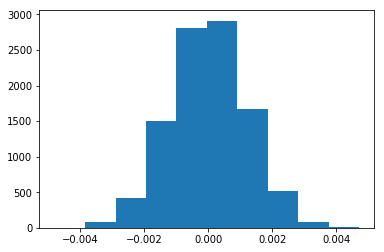

In [42]:
p_diffs = np.asarray(p_diffs)
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [43]:
#obs_diff is the obsereved difference in conversion rates from the actual dataset
obs_diff = df2[df2['group'] == "treatment"].converted.mean() - df2[df2['group'] == "control"].converted.mean()
p_val = (p_diffs > obs_diff).mean()
p_val

0.90749999999999997

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Answer:**  
*As mentioned before, the null hypothesis assumes there is no difference between conversion rate of old page and new page. After simulating the sampling distribution under the null we calculated the p-value to be 0.91.*  
  
*Since the p-value > 0.05, we fail to reject the null hypothesis. Accordingly, in terms of conversion rate, there is no difference between the new and old pages.*

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [44]:
import statsmodels.stats.proportion as sm_z
#number of conversions
convert_old = df2.query("converted == 1 & landing_page == 'old_page'").converted.count()
convert_new = df2.query("converted == 1 & landing_page == 'new_page'").converted.count()
#unique number of individuals receiving each page
n_old = df2[df2['landing_page'] == 'old_page'].shape[0]
n_new = df2[df2['landing_page'] == 'new_page'].shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [45]:
convert = np.array([convert_new, convert_old])
n_diff = np.array([n_new, n_old])
stat, pval = sm_z.proportions_ztest(convert, n_diff, alternative='larger')
pval

0.90505831275902449

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Answer:**  
*Both values are greater than 0.05 which confirms that we fail to reject the null hypothesis.*

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Answer:**  
*Logistic Regression*

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [46]:
#import the necessary library
import statsmodels.api as sm

df2['intercept'] = 1
df2['ab_page'] = pd.get_dummies(df['group'])['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [47]:
#fitting the model using new column ab_page
lm = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = lm.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 04 Dec 2019   Pseudo R-squ.:               8.077e-06
Time:                        15:25:56   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [48]:
#first we need to exponentiate the coeifficient
np.exp(-0.0150)

0.98511193960306265

In [49]:
#we'll calculate the reciprocal since the returned value was less than 1
1/np.exp(-0.0150)

1.0151130646157189

*As per the above model, we can see that conversion is 1.02 times less likely for an individual in the treatment group than the control group. However, given the p-value associated with this variable (an individual being from the treatment or control group), it suggests that there is no statistical significance for predicting the conversion based on this variable.*

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**Answer:**  
*The p-value associated with ab_page from the above logistic regression model is 0.190. There is a difference between the p-values because in logistic regression, this p-value is indicating the likelihood of conversion based on which group the individual is in or which page is being viewed. Given the value is greater than 0.05, this indicates that the landing page is not statistically significant for predicting conversion which means that the regression model is testing a two-sided hypothesis since it implies that $p_{new}$ = $p_{old}$ (the null hypothesis).*  

*Hypothesis for regression model:*  
  
$$H_0: p_{new}  =  p_{old}$$
$$H_1: p_{new}  !=  p_{old}$$
  
*However, in the previous section; we were using the p-value in a one-sided test to decide whether to reject the null hypothesis indicating that the old page had a higher conversion rate or fail to reject the null hypthesis which would indicate that the conversion rate for the new page was in fact higher (the alternative hypothesis). We got a p-value greater than 0.05 which is the Type I error rate so we failed to reject the null hypothesis.*  
  
*Hypothesis for z-test:*  
  
$$H_0: p_{new} - p_{old} \leq 0$$
$$H_1: p_{new} - p_{old} > 0$$

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer:**  
*It would be a good idea to add other factors into the regression model to better understand what influences the conversion, especially that based on the previous model it appears that the landing page did not have statistical significance on conversion. However, there are some disadvantages to adding additional factors such as having the variables correlated with one another (multi-collinearity) which might affect the correlation coefficient and thus we might be misinterpretting the results so these should be chosen carefully to identify which are the best factors that will help us understand which inputs actually influence the response.*

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [50]:
#reading the countries and reading first few rows
countries = pd.read_csv('countries.csv')
countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [51]:
#joining the 2 datasets on the user id to get the country each user lives in
df2 = df2.join(countries.set_index('user_id'), how='left', on='user_id')
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [52]:
#get the unique values of the country column
df2.country.value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [53]:
#add a dummy column for the countries
df2[['CA', 'UK', 'US']] = pd.get_dummies(df2['country'])
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1


In [54]:
#fitting a model using Canada and UK - US is the baseline
lm = sm.Logit(df2['converted'], df2[['intercept', 'CA', 'UK']])
results = lm.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Wed, 04 Dec 2019   Pseudo R-squ.:               1.521e-05
Time:                        15:26:38   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
CA            -0.0408      0.027     -1.518      0.129      -0.093       0.012
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

In [55]:
#calculating reciprocal for Canada and exponentiating UK coefficient to be able to interpret the results
1/np.exp(-0.0408), np.exp(0.0099)

(1.0416437559600236, 1.0099491671175422)

**Results:**  
*Individuals in Canada are 1.04 times less likely to convert compared to individuals in US keeping all other variables constant. While individuals in the UK are 1.01 times more likely to convert than individuals in the US keeping all else constant.
However, the p_values are 0.129 and 0.456 respectively which means that these variables are not statistically significant or have no impact to predict the output of whether or not an indivdual converts.*

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [56]:
#adding new columns ab_page_UK, ab_page_US and ab_page_CA to check interaction between page and country
df2['ab_page_CA'] = df2['ab_page'] * df2['CA']
df2['ab_page_UK'] = df2['ab_page'] * df2['UK']
df2['ab_page_US'] = df2['ab_page'] * df2['US']

In [57]:
df2.head(5)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US,ab_page_CA,ab_page_UK,ab_page_US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1,0,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1,0,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1,0,0,0


In [58]:
#fitting a logistic regression model using ab_page, Canada, UK and interaction columns
lm = sm.Logit(df2['converted'], df2[['intercept', 'ab_page', 'CA', 'UK', 'ab_page_CA', 'ab_page_UK']])
results = lm.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Wed, 04 Dec 2019   Pseudo R-squ.:               3.482e-05
Time:                        15:26:56   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page       -0.0206      0.014     -1.505      0.132      -0.047       0.006
CA            -0.0175      0.038     -0.465      0.642      -0.091       0.056
UK            -0.0057      0.019     -0.306      0.760      -0.043       0.031
ab_page_CA    -0.0469      0.054     -0.872      0.383      -0.152       0.059
ab_page_UK     0.0314      0.027      1.181      0.238      -0.021       0.084
==============================================================================
"""

In [59]:
#to be able to interpret the coefficient results
1/np.exp(-0.0206), 1/np.exp(-0.0175), 1/np.exp(-0.0057)

(1.0208136445037459, 1.0176540221507617, 1.0057162759095335)

**Conclusion:**  
*As per the above logisitic regression model where we used the group, and countries we can see that an individual viewing the new page in the treatment group is 1.02 times less likely to convert than an individual viewing the old page in the control group keeping all the other variables constant. Also, individuals in Canada are 1.02 times less likely to convert compared to individuals in US keeping all other variables constant. Finally, individuals in the UK are 1.01 times less likely to convert than individuals in the US keeping all else constant.*  
  
*The p-vales are 0.191, 0.130 and 0.457 respectively which tells us that these exploration variables are not statistically significant to prefict the response.*  
  
*The p-values from the interaction variables ab_page_CA and ab_page UK which are 0.38 and 0.24 respectively, suggest that the effect of the landng page on conversion does not depend on the country where an individual is located since the values are greater than 0.05 which is our Type I error rate so it's a very slight statisitical significance.*

**Investigating effect of time of the day on the conversion rate:**  
*Since this experiment is occuring throughout the day, we will investigate if an individual viewing the pages in a certain time as in morning, noon, afternoon, evening or at night can affect their decision of conversion.*

In [96]:
#converting timestame column to datetime
df2['timestamp'] = pd.to_datetime(df2['timestamp'])
#extracting the hour from timestamp
df2['hour_of_day'] = df2['timestamp'].dt.hour

#defining a function to determine the time of day (morning, noon, afternoon, evening and night)
def time_of_day(hour):
    if 6 <= hour < 12:
        return "morning"
    elif  hour == 12:
        return "noon"
    elif 13 <= hour <= 17:
        return "afternoon"
    elif 18 <= hour <= 20:
        return "evening"
    else:
        return "night"

#adding time of day column to df2 by applying the function on the hour of day column
df2['time_of_day'] = df2['hour_of_day'].apply(time_of_day)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US,hour_of_day,time_of_day
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1,22,night
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1,8,morning
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1,16,afternoon
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1,18,evening
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1,1,night


In [97]:
#adding dummy variables to be used in the logistic regression model
df2[['afternoon','evening','morning', 'night', 'noon']] = pd.get_dummies(df2['time_of_day'])
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US,hour_of_day,time_of_day,afternoon,evening,morning,night,noon
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1,22,night,0,0,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1,8,morning,0,0,1,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1,16,afternoon,1,0,0,0,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1,18,evening,0,1,0,0,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1,1,night,0,0,0,1,0


In [109]:
#fit a logistic regression model to check whether time of day affect conversion
lm = sm.Logit(df2['converted'], df2[['intercept', 'morning', 'noon', 'afternoon', 'evening']])
results = lm.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290579
Method:                           MLE   Df Model:                            4
Date:                Wed, 27 Nov 2019   Pseudo R-squ.:               2.715e-05
Time:                        22:30:35   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.2165
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0115      0.009   -214.169      0.000      -2.030      -1.993
morning        0.0236      0.015      1.600      0.110      -0.005       0.053
noon           0.0556      0.029      1.909      0.056      -0.001       0.113
afternoon      0.0179      0.016      1.143      0.253      -0.013       0.049
evening        0.0258      0.019      1.384      0.166      -0.011       0.062
==============================================================================
"""

In [110]:
#getting exponent of coefficients to be able to describe and interpret the results
np.exp(0.0236), np.exp(0.0556), np.exp(0.0179), np.exp(0.0258)

(1.0238806836957661, 1.0571747292596514, 1.0180611651828, 1.026135700809198)

**Conclusion:**  
*Given the above, individuals viewing the pages in the morning, afternoon or evening are 1.02 times more likely to convert than individuals viewing at night. Conversion is 1.05 more likely during noon than at night. the p-values are 0.110, 0.056, 0.253 and 0.166 respectively. Therefore, we conclude that these variables are not statstically significant to predict the outcome.*

In [60]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0